# Refugee Data: Where, When & How #

### Group members: Camille Stacho, Julia D'Zmura, Jordan Mess ###

#### Introduction: ####

For this project, we wanted to....

#### Required Tools ####

- requests
- pandas

Current resources:
   - [WRAPS](http://www.wrapsnet.org/admissions-and-arrivals/)
   - [Homeland Security](https://www.dhs.gov/immigration-statistics/refugees-asylees)


The following things are required imports. We used these libraries to work with dataframes, arrays, and to make plots.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [25]:
df = pd.read_csv('data/past10.csv')
df.columns = ['Country/territory of asylum/residence', 'Origin', 'Year','Month','Value']
df = df.iloc[3:]

In [26]:
df=df.replace('USA (EOIR)', 'USA')
df=df.replace('USA (INS/DHS)', 'USA')

df.head()

,Country/territory of asylum/residence,Origin,Year,Month,Value
3,Australia,Afghanistan,1999,January,8
4,Australia,Afghanistan,1999,February,10
5,Australia,Afghanistan,1999,March,25
6,Australia,Afghanistan,1999,April,25
7,Australia,Afghanistan,1999,May,7


Countries we look at: USA , Germany, France, Norway?

In [27]:
country_df = df.loc[df['Country/territory of asylum/residence'] == 'USA']
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'Germany'])
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'France'])
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'Norway'])

country_df['Value'] = pd.to_numeric(country_df['Value'])
country_df = country_df.groupby(['Country/territory of asylum/residence','Year'])['Value'].sum()
country_df=country_df.reset_index()


In [28]:
df1999=country_df.loc[country_df['Year'] == '1999']
df2000=country_df.loc[country_df['Year'] == '2000']

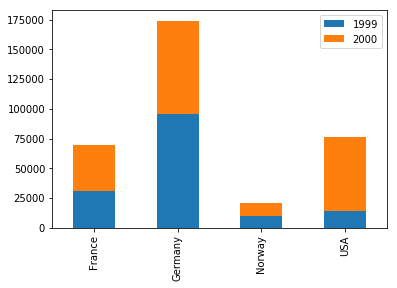

In [29]:
index= ['France','Germany','Norway','USA']
firstyear = df1999['Value'].values
secondyear = df2000['Value'].values


df = pd.DataFrame({'1999': firstyear,'2000': secondyear}, index=index)
ax = df.plot.bar(stacked=True)

In [30]:
dff = pd.read_csv('data/yearstate.csv')
dff.columns = ['Year', 'Africa', 'Asia','NAN','Europe','Union','Kosovo','Caribbean','South Asia','PSI','Total', 'Nan']
dff = dff.iloc[8:].reset_index()
dff = dff.drop(columns=['NAN','Nan','index'])

dff=dff.iloc[:45]

In [31]:
dff['Europe'] = dff['Europe'].str.replace(',', '')
dff['Asia'] = dff['Asia'].str.replace(',', '')
dff['Caribbean'] = dff['Caribbean'].str.replace(',', '')
dff['Africa'] = dff['Africa'].str.replace(',', '')


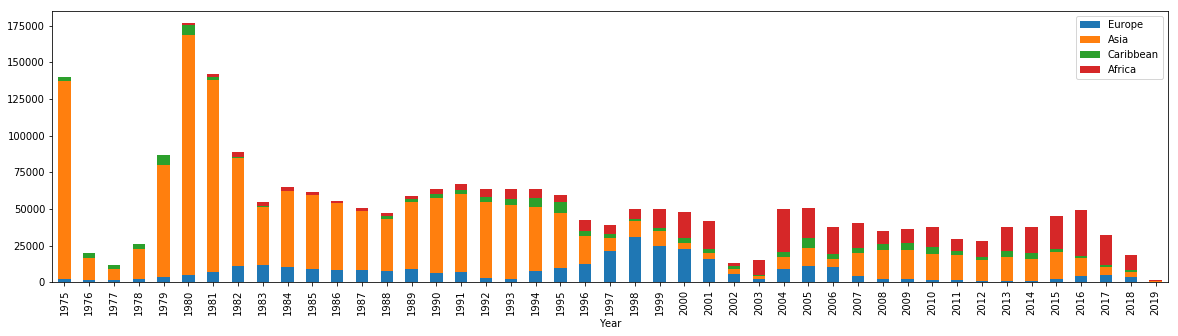

In [32]:
index1 = dff['Year']
europe = pd.to_numeric(dff['Europe'].values)
asia = pd.to_numeric(dff['Asia'].values)
caribbean = pd.to_numeric(dff['Caribbean'].values)
africa = pd.to_numeric(dff['Africa'].values)

data = pd.DataFrame({'Europe': europe,'Asia': asia, 'Caribbean': caribbean, 'Africa':africa}, index=index1)
ax1 = data.plot.bar(stacked=True,figsize=(20,5))

In [33]:
eu = pd.read_csv('data/arrival_EU_by_Country.csv')
eu = eu.drop('Flag and Footnotes',axis=1)
eu_date_country= eu.loc[:,'TIME':'GEO']

In [34]:
eu.set_index('TIME')
print(len(index1))

45


Cleaning Data:
This data file includes the refugee population in each country by year

In [35]:
df = pd.read_csv('data/world_data.csv')
df = df.drop('Indicator Code',axis=1)
df = df.drop('Indicator Name',axis=1)
df= df.drop(df.iloc[:,2:32],axis=1)
df = df.fillna(0)

In [36]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
germ = df.loc[df['Country Code'] == 'DEU']
germ_x=np.array(germ.columns.values)[2:-1]
germ_y=np.array(germ.loc[:,'1990':])[0][:-1]


<Figure size 1040x560 with 0 Axes>

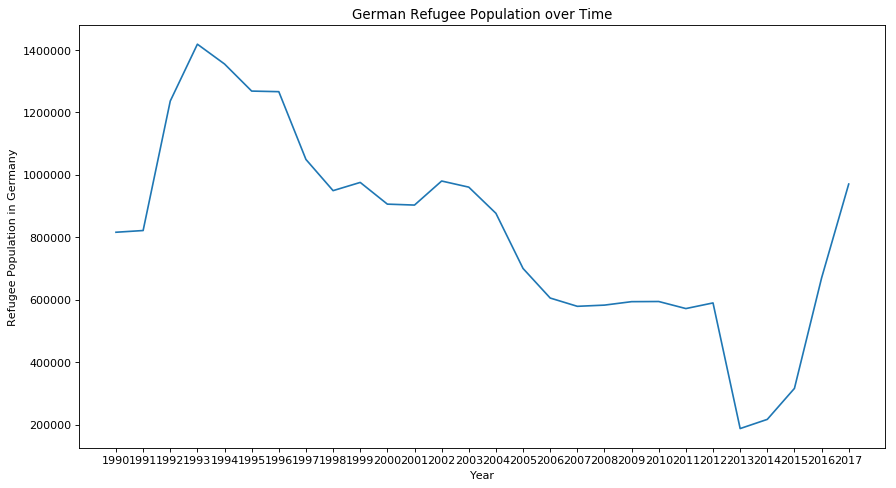

In [37]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in Germany')
plt.title('German Refugee Population over Time')
plt.plot(germ_x,germ_y)

In [38]:
france = df.loc[df['Country Code'] == 'FRA']
franc_x=np.array(france.columns.values)[2:-1]
franc_y=np.array(france.loc[:,'1990':])[0][:-1]


**French Asylum Seekers over Time**<br>
Data from Worldbank: https://data.worldbank.org/indicator/SM.POP.REFG

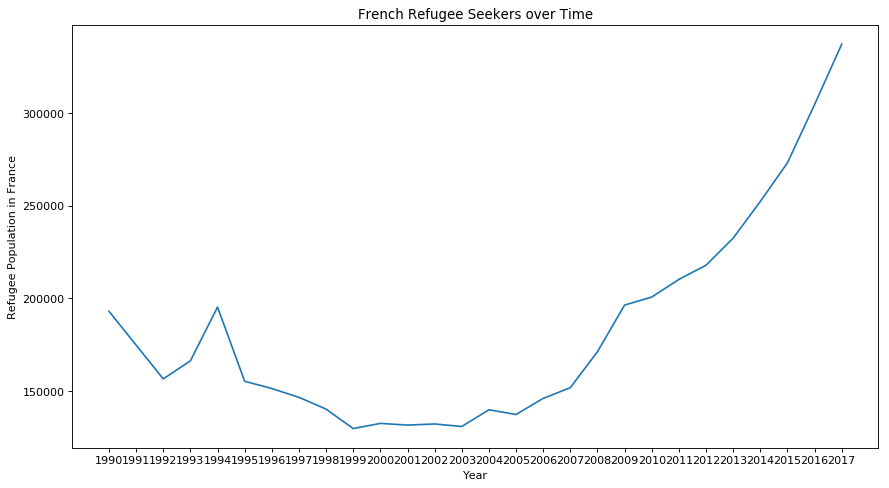

In [39]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in France')
plt.title('French Refugee Seekers over Time')
plt.plot(franc_x,franc_y)

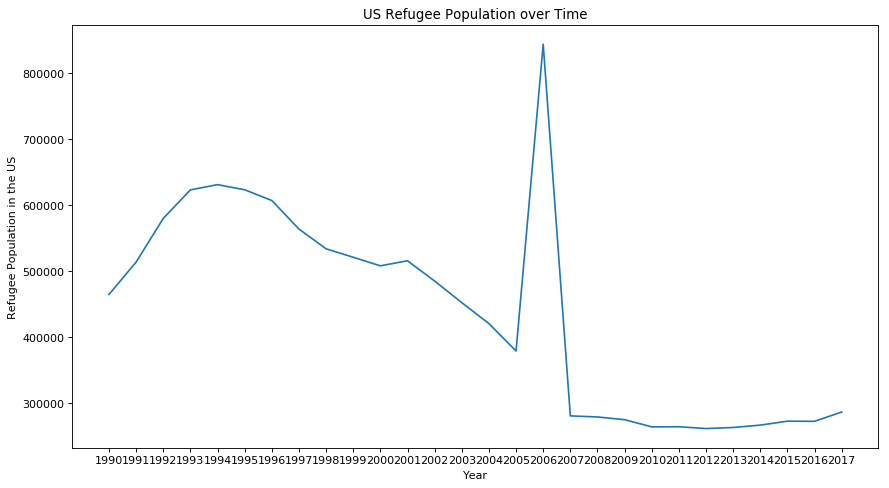

In [40]:
usa = df.loc[df['Country Code'] == 'USA']
usa_x=np.array(usa.columns.values)[2:-1]
usa_y=np.array(usa.loc[:,'1990':])[0][:-1]
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in the US')
plt.title('US Refugee Population over Time')
plt.plot(usa_x,usa_y)

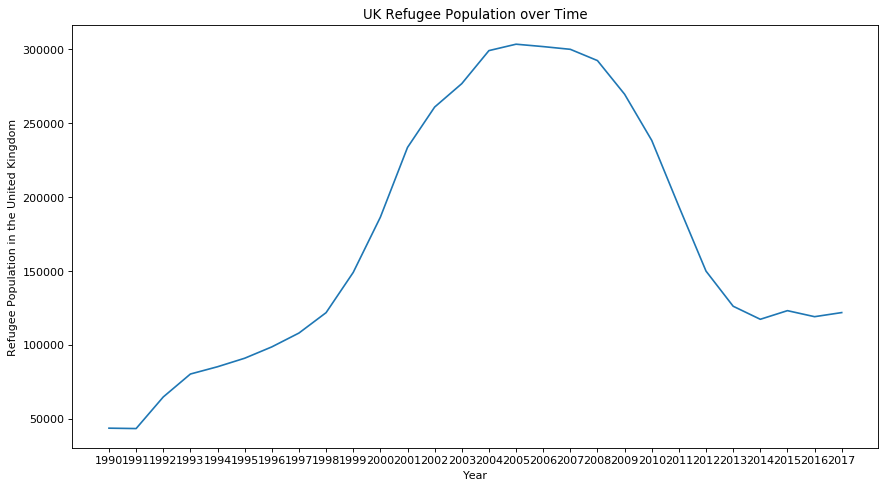

In [41]:
uk = df.loc[df['Country Code'] == 'GBR']
uk_x=np.array(uk.columns.values)[2:-1]
uk_y=np.array(uk.loc[:,'1990':])[0][:-1]
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in the United Kingdom')
plt.title('UK Refugee Population over Time')
plt.plot(uk_x,uk_y)

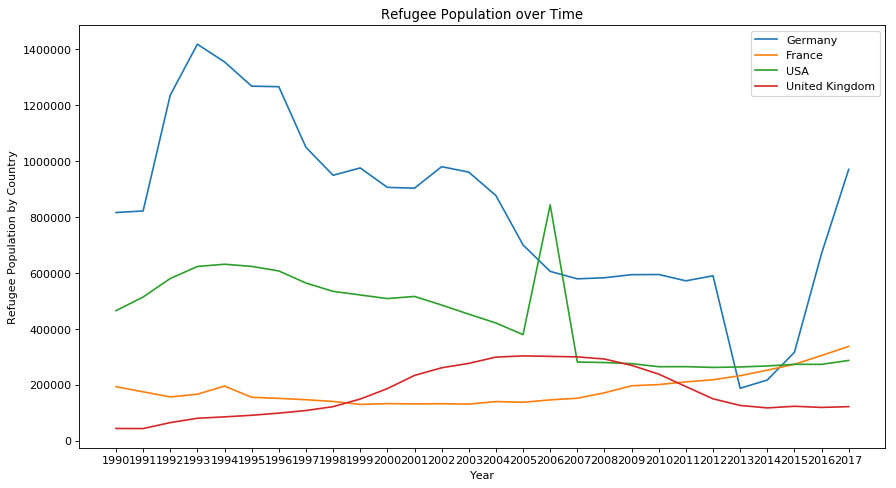

In [42]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population by Country')
plt.title('Refugee Population over Time')
germany = plt.plot(germ_x, germ_y)
france = plt.plot(franc_x, franc_y)
usa = plt.plot(usa_x, usa_y)
uk = plt.plot(uk_x, uk_y)
plt.legend(('Germany','France','USA','United Kingdom'))
plt.show()

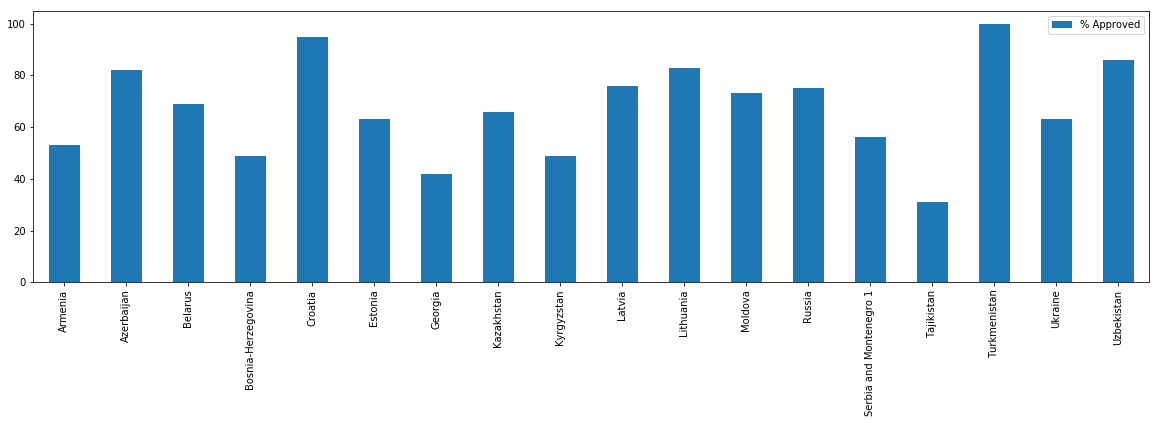

In [43]:
##Homeland security: 
df = pd.read_csv('HomeLandSecurity/RefugeeApplications/2004table13CSV.csv')
df = df.drop(columns="Unnamed: 1")
df = df.drop(columns="Unnamed: 2")
df = df.drop(columns="Unnamed: 3")
df = df.drop(columns="Unnamed: 4")
df = df.drop(columns="Unnamed: 6")
df = df.drop(columns="Unnamed: 7")
df = df.drop(columns="Unnamed: 8")
df = df.drop(columns="Unnamed: 9")
df = df.drop(columns="Unnamed: 10")
df = df.drop(columns="Unnamed: 11")
df.columns = ['Region and country of birth', 'Percent approved']
df_europe = df.iloc[9:27]

index= df_europe['Region and country of birth'].values
percentApproved = pd.to_numeric(df_europe['Percent approved']).values

df_new = pd.DataFrame({'% Approved': percentApproved}, index=index)
ax1 = df_new.plot.bar(figsize=(20,5))

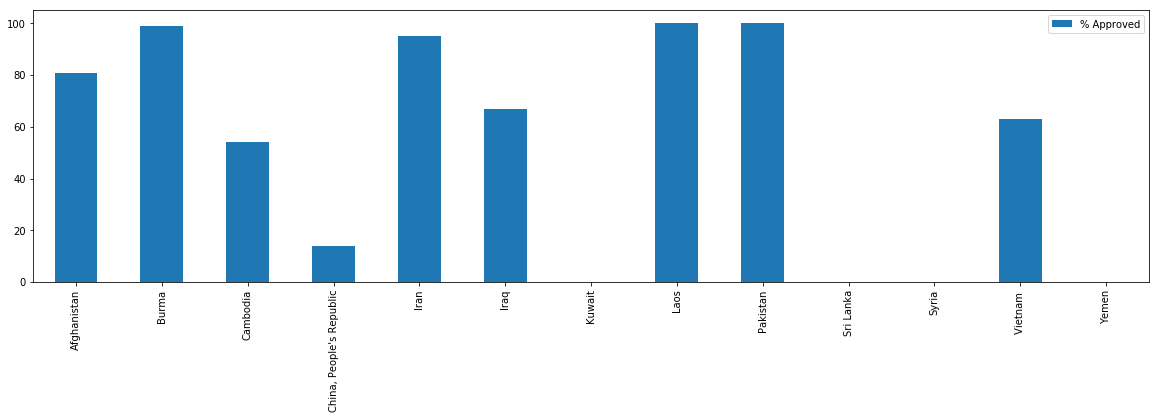

In [44]:
df_asia = df.iloc[28:41]
index= df_asia['Region and country of birth'].values
percentApproved = pd.to_numeric(df_asia['Percent approved']).values

df_new = pd.DataFrame({'% Approved': percentApproved}, index=index)
ax1 = df_new.plot.bar(figsize=(20,5))

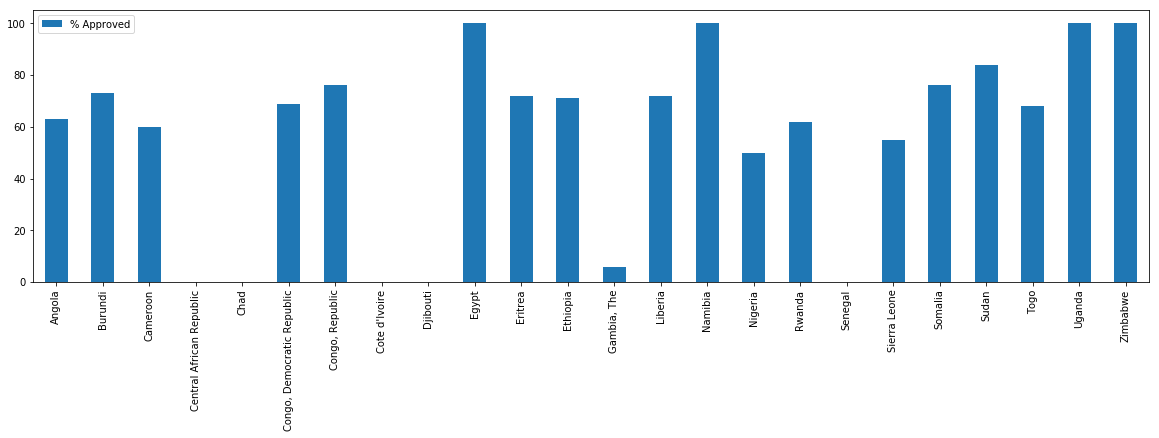

In [45]:
df_africa = df.iloc[42:66]
index= df_africa['Region and country of birth'].values
percentApproved = pd.to_numeric(df_africa['Percent approved']).values

df_new = pd.DataFrame({'% Approved': percentApproved}, index=index)
ax1 = df_new.plot.bar(figsize=(20,5))

Based on how many people come, what is the chance of being accepted?

In [79]:
df11 = pd.read_csv('data/asluym-rejections.csv')
df11 = df11.drop(columns=['Unnamed: 5', 'Unnamed: 6'])
df11 = df11.loc[2:]
df11 = df11.rename(columns = {'Unnamed: 0':'Country'})
df11.head()


,Country,Refugee status,Subsidiary protection,Humanitarian reasons,Rejected
2,Ireland,75.5,5.8,7.2,11.5
3,Lithuania,74.0,3.5,0.0,22.5
4,Latvia,9.2,65.0,0.0,25.8
5,Malta,15.1,52.6,1.1,31.3
6,Slovakia,1.1,24.2,42.9,31.9


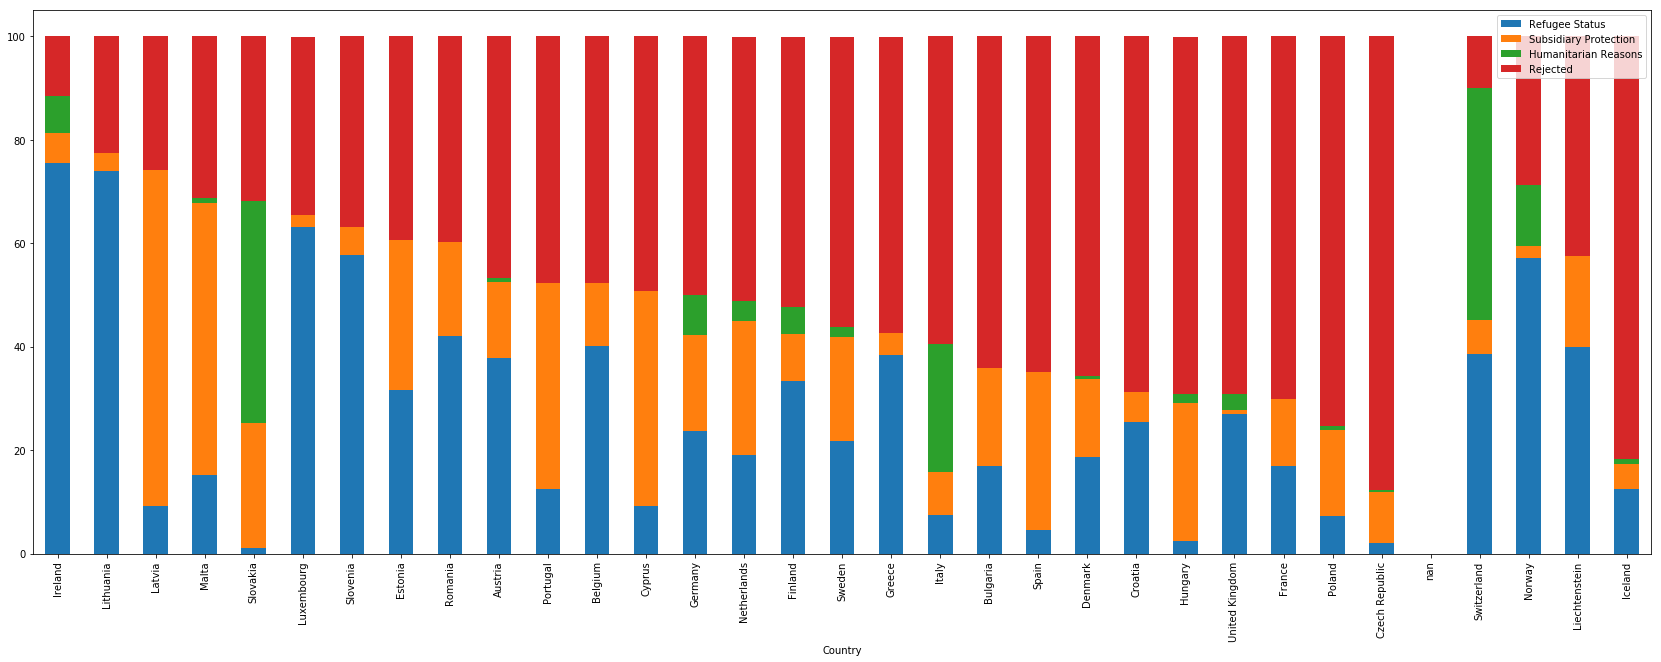

In [84]:
index1 = df11['Country']

refugeestatus = pd.to_numeric(df11['Refugee status'].values)
subsidiaryprotection = pd.to_numeric(df11['Subsidiary protection'].values)
humanitarian = pd.to_numeric(df11['Humanitarian reasons'].values)
rejected = pd.to_numeric(df11['Rejected'].values)

data2 = pd.DataFrame({'Refugee Status': refugeestatus,'Subsidiary Protection': subsidiaryprotection, 'Humanitarian Reasons': humanitarian, 'Rejected':rejected}, index=index1)
ax2 = data2.plot.bar(stacked=True,figsize=(29,10))